# Bank Customer Churn Prediction - XGBoost

**Objective:** Predict which bank customers are likely to churn based on their demographic and financial data

**Dataset:** BankChurners.csv  
**Source:** Kaggle

**Steps:**
1. Data cleaning & preprocessing
2. Train/Test split
3. Model training
4. Model evaluation
5. Feature importance
6. Compare with logistic regression
7. Save model for deployment

In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#Load data set
raw_csv_data = pd.read_csv("Churn_Modelling.csv")
raw_csv_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [54]:
#Copy to another csv & check data/missing values/ understand columns & values
df = raw_csv_data.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Data cleaning & preprocessing

In [55]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [57]:
#After checking the values, we can start dropping what it is not useful for this project and double-check if they were dropped
df.drop(["Surname", "RowNumber", "CustomerId"],axis=1)
df = df.drop(["Surname", "RowNumber", "CustomerId"], axis=1, errors='ignore')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [67]:
#Fill numeric missing values with median
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0
1,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0
2,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0
3,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,0.0,0.0
9998,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,0.0
9999,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,0.0
10000,792.0,0.0,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,0.0,0.0


In [59]:
#Geography(one hot encoding) needs to be encode since it is and object & Gender(binary) too

df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1}) #Encode Gender

df = pd.get_dummies(df, columns=["Geography"], drop_first=True) #One-Hot Encode Geography

#Geography becomes Geography_Germany, Geography_Spain (France is the baseline)

In [ ]:
df.select_dtypes(include=['object']).columns
#Added this just to confirm "object" columns were dropped


Index([], dtype='object')

## Train/Test Split


In [61]:
#Target
y = df["Exited"]

#Features
X = df.drop("Exited", axis=1)

#Quick check
X.head(), y.head()

(   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0        619.0       0  42.0     2.0       0.00            1.0        1.0   
 1        608.0       0  41.0     1.0   83807.86            1.0        0.0   
 2        502.0       0  42.0     8.0  159660.80            3.0        1.0   
 3        699.0       0  39.0     1.0       0.00            2.0        0.0   
 4        850.0       0  43.0     2.0  125510.82            1.0        1.0   
 
    IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
 0             1.0        101348.88                  0                0  
 1             1.0        112542.58                  0                1  
 2             0.0        113931.57                  0                0  
 3             0.0         93826.63                  0                0  
 4             1.0         79084.10                  0                1  ,
 0    1.0
 1    0.0
 2    1.0
 3    0.0
 4    0.0
 Name: Exited, dtype: float64)

In [62]:
from sklearn.model_selection import train_test_split

#Split data (80% train, 20% test), stratify to maintain churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.8, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

#Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (8001, 11)
X_test shape: (2001, 11)
y_train distribution:
 0.0    0.796275
1.0    0.203725
Name: Exited, dtype: float64
y_test distribution:
 0.0    0.796102
1.0    0.203898
Name: Exited, dtype: float64


## Model training XGBoost

In [63]:
from xgboost import XGBClassifier

#Start XGBoost classifier with basic hyperparameters
xgb_model = XGBClassifier(
    n_estimators=100,       #Number of trees
    max_depth=4,            #Depth of each tree
    learning_rate=0.1,      #Step size shrinkage
    subsample=0.8,          #Row sampling
    colsample_bytree=0.8,   #Feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   
)

In [64]:
#Train the model
xgb_model.fit(X_train, y_train)

/Users/lashmy/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Model evaluation

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

#Predict on test set
y_pred = xgb_model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

#ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)


Test Accuracy: 0.8675662168915542
Confusion Matrix:
 [[1535   58]
 [ 207  201]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1593
         1.0       0.78      0.49      0.60       408

    accuracy                           0.87      2001
   macro avg       0.83      0.73      0.76      2001
weighted avg       0.86      0.87      0.86      2001

ROC-AUC: 0.7281188840884752


**Interpretation**
- Test Accuracy: 0.8676 → 86.8%

Higher than Logistic Regression (~81%), showing better overall prediction on unseen data

- ROC-AUC: 0.728 → much better than Logistic Regression (~0.58–0.60)

Shows that the model is better at distinguishing churners from non-churners

- Confusion Matrix:

True Negatives (TN) = 1535 → customers who did not churn and were correctly predicted

False Positives (FP) = 58 → customers predicted as churners but actually didn’t churn

False Negatives (FN) = 207 → churners missed by the model

True Positives (TP) = 201 → churners correctly identified

Compared to Logistic Regression, XGBoost catches more churners (201 vs 79 TP) while maintaining low FP

- Classification Report:
Class 0 (Non-churners)
- Precision = 0.88 → 88% of predicted non-churners actually stayed
- Recall = 0.96 → captures 96% of all actual non-churners
- F1-score = 0.92 → strong overall performance

Class 1 (Churners)
- Precision = 0.78 → 78% of predicted churners actually churned
- Recall = 0.49 → captures 49% of actual churners (significant improvement from Logistic Regression)
- F1-score = 0.60 → better balance between precision and recall

XGBoost improves recall for churners, which is crucial for targeting high-risk customers

## Feature importance

              Feature  Importance
5       NumOfProducts    0.280405
2                 Age    0.171696
7      IsActiveMember    0.165152
9   Geography_Germany    0.113787
1              Gender    0.060558
4             Balance    0.059853
10    Geography_Spain    0.042625
0         CreditScore    0.028583
8     EstimatedSalary    0.028389
3              Tenure    0.024797
6           HasCrCard    0.024155


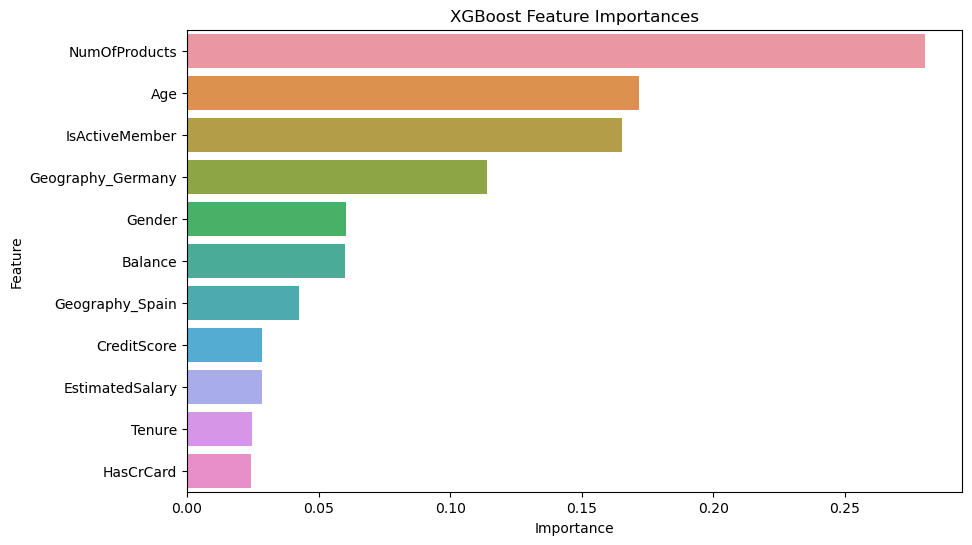

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

#Visualise top features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("XGBoost Feature Importances")
plt.show()

- NumOfProducts: Customers with fewer products are the most likely to churn
- Age & IsActiveMember: Older, inactive customers are higher risk
- Geography_Germany: German customers have a higher likelihood of leaving
- Financial factors like Balance and EstimatedSalary are less influential than behavioral/demographic factors

**Insights**

- High-risk customers: Older, inactive, low-product German customers with moderate balance
- Low-risk customers: Active members with multiple products
- Recommendations: Focus retention campaigns on high-risk segments (e.g., personalized offers, loyalty programs, product bundling)

## Compare with logistic regression

**Test Accuracy:**
Logistic Regression: 81%

XGBoost: 86.8% → better overall classification

**ROC-AUC:**
Logistic Regression: 0.578 → barely better than random for churners

XGBoost: 0.728 → much better separation of churners

**Confusion Matrix:**
- Logistic Regression:
TN = 1533, FP = 60

FN = 329, TP = 79

- XGBoost:
TN = 1535, FP = 58

FN = 207, TP = 201 → captures more actual churners

**Churn Class Metrics:**
- Logistic Regression: Precision = 0.57, Recall = 0.19, F1 = 0.29

- XGBoost: Precision = 0.78, Recall = 0.49, F1 = 0.60 → much better for business action

**Feature Importance Comparison**

- **Age:**

Logistic Regression: OR = 2.11 → older customers more likely to churn

XGBoost: Importance = 0.172 → older age strongly predictive

- **IsActiveMember:**

Logistic Regression: OR = 0.60 → active members safer

XGBoost: Importance = 0.165 → inactivity increases churn risk

- **Balance:**

Logistic Regression: OR = 1.17 → higher balance slightly increases churn

XGBoost: Importance = 0.060 → less influential

- **NumOfProducts:**

Logistic Regression: OR = 0.95 → more products slightly reduce churn

XGBoost: Importance = 0.280 → top driver of churn

- **Geography_Germany:**

Logistic Regression: OR = 1.43 → German customers more likely to churn

XGBoost: Importance = 0.114 → geography still relevant

- **Gender / Others:**

Logistic Regression: OR = 0.77 → females less likely to churn

XGBoost: Importance = 0.061 → minor effect

**Insights**
- Logistic Regression is interpretable but misses many churners
- XGBoost improves churn detection, especially for high-risk segments
- High-risk customers: older, inactive, fewer products, high balance, Germany
- Low-risk customers: active members, multiple products, lower balance

## Save model for deployment

In [72]:
import joblib
from sklearn.preprocessing import scale

#Save the trained XGBoost model
joblib.dump(xgb_model, "XGBoost_churn_model.pkl")

#Save the scaler (if you used one)
joblib.dump(scale, "scaler.pkl")


['scaler.pkl']